# IDÉES 1
1. Analyse de la corrélation entre les ingrédients et la satisfaction des utilisateurs
Objectif : Comprendre quels ingrédients sont les plus courants dans les recettes bien notées.
Exemple : En observant les ingrédients des recettes ayant une note de 4 ou 5 étoiles, tu peux déterminer les ingrédients qui plaisent le plus aux utilisateurs. Cela pourrait aider à proposer des suggestions d'ingrédients dans les paniers d'achat en ligne ou à orienter les créateurs de recettes vers des ingrédients plus populaires.

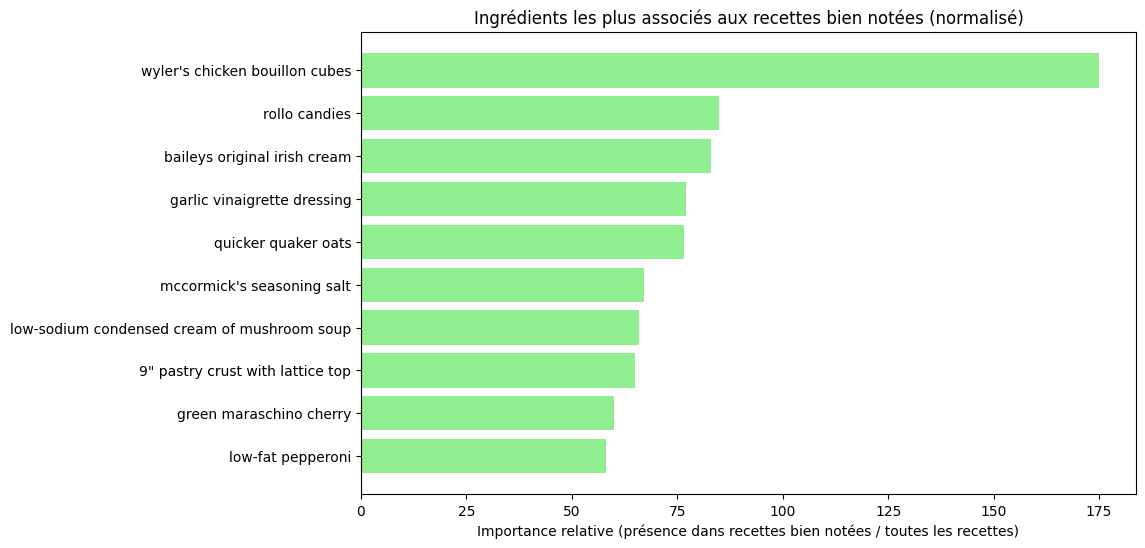

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

class RecipeAnalysis:
    def __init__(self, interactions_path, recipes_path):
        # Charger les datasets
        self.interactions = pd.read_csv(interactions_path)
        self.recipes = pd.read_csv(recipes_path)

    def get_high_rated_recipes(self):
        # Filtrer les interactions avec une note de 4 ou 5
        high_rated_interactions = self.interactions[self.interactions['rating'] >= 4]
        # Fusionner les interactions bien notées avec les recettes en utilisant 'recipe_id'
        return pd.merge(high_rated_interactions, self.recipes, left_on='recipe_id', right_on='id')

    def count_ingredients(self, recipes_df):
        # Extraire et compter les ingrédients
        ingredient_lists = recipes_df['ingredients'].apply(eval)  # Convertir les chaînes en listes
        return Counter([ingredient for sublist in ingredient_lists for ingredient in sublist])

    def calculate_relative_importance(self, high_rated_counts, all_counts):
        # Calculer la fréquence relative des ingrédients bien notés par rapport à tous les ingrédients
        importance = {ingredient: high_rated_counts[ingredient] / all_counts[ingredient] 
                      for ingredient in high_rated_counts if all_counts[ingredient] > 0}
        return sorted(importance.items(), key=lambda x: x[1], reverse=True)

    def plot_ingredient_importance(self, sorted_ingredients_by_importance):
        # Extraire les ingrédients et leurs importances relatives
        ingredients, importance = zip(*sorted_ingredients_by_importance[:10])

        # Créer un graphique à barres
        plt.figure(figsize=(10, 6))
        plt.barh(ingredients, importance, color='lightgreen')
        plt.xlabel('Importance relative (présence dans recettes bien notées / toutes les recettes)')
        plt.title('Ingrédients les plus associés aux recettes bien notées (normalisé)')
        plt.gca().invert_yaxis()  # Inverser l'ordre pour que le premier soit en haut
        plt.show()

    def analyze(self):
        # Obtenir les recettes bien notées
        high_rated_recipes = self.get_high_rated_recipes()

        # Compter les ingrédients dans les recettes bien notées et dans toutes les recettes
        high_rated_counts = self.count_ingredients(high_rated_recipes)
        all_counts = self.count_ingredients(self.recipes)

        # Calculer l'importance relative
        sorted_ingredients_by_importance = self.calculate_relative_importance(high_rated_counts, all_counts)

        # Afficher les résultats
        self.plot_ingredient_importance(sorted_ingredients_by_importance)

# Utilisation de la classe
recipe_analysis = RecipeAnalysis('archive-3/RAW_interactions.csv', 'archive-3/RAW_recipes.csv')
recipe_analysis.analyze()


# Idées 2
2. Étude de la durée de préparation et de la note moyenne des recettes
Objectif : Explorer la relation entre le temps de préparation d'une recette et la satisfaction des utilisateurs.
Exemple : Une analyse des recettes qui montrent si les utilisateurs préfèrent des recettes plus rapides (par exemple, celles qui prennent moins de 30 minutes) ou s'ils sont prêts à investir plus de temps pour des plats plus complexes. Cela pourrait être utile pour les plateformes de livraison de repas à domicile ou pour optimiser les menus de restaurants.

prep_time_category
<30 min        4.447236
30-60 min      4.405543
60-120 min     4.391529
120-240 min    4.360985
240+ min       4.324515
Name: rating, dtype: float64


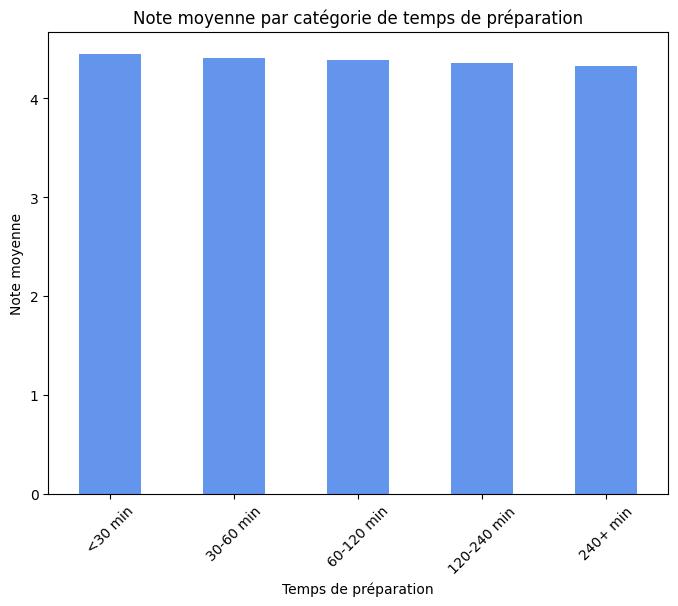

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

class RecipeTimeAnalysis:
    def __init__(self, interactions_path, recipes_path):
        # Charger les datasets
        self.interactions = pd.read_csv(interactions_path)
        self.recipes = pd.read_csv(recipes_path)
        self.merged_data = self.merge_data()
        
    def merge_data(self):
        # Fusionner les deux datasets sur la colonne 'recipe_id'
        return pd.merge(self.interactions, self.recipes, left_on='recipe_id', right_on='id')

    def categorize_prep_time(self, bins, labels):
        # Ajouter une colonne 'prep_time_category' pour catégoriser les recettes selon le temps de préparation
        self.merged_data['prep_time_category'] = pd.cut(self.merged_data['minutes'], bins=bins, labels=labels)

    def calculate_avg_rating_per_category(self):
        # Calculer la note moyenne par catégorie de temps de préparation
        return self.merged_data.groupby('prep_time_category')['rating'].mean()

    def plot_avg_rating(self, avg_rating_per_time_category):
        # Créer un graphique des notes moyennes par catégorie de temps de préparation
        plt.figure(figsize=(8, 6))
        avg_rating_per_time_category.plot(kind='bar', color='cornflowerblue')
        plt.title('Note moyenne par catégorie de temps de préparation')
        plt.xlabel('Temps de préparation')
        plt.ylabel('Note moyenne')
        plt.xticks(rotation=45)
        plt.show()

    def analyze(self, bins, labels):
        # Exécuter l'analyse complète
        self.categorize_prep_time(bins, labels)
        avg_rating_per_time_category = self.calculate_avg_rating_per_category()
        print(avg_rating_per_time_category)
        self.plot_avg_rating(avg_rating_per_time_category)

# Utilisation de la classe
bins = [0, 30, 60, 120, 240, 480]  # Intervalles de temps (minutes)
labels = ['<30 min', '30-60 min', '60-120 min', '120-240 min', '240+ min']  # Labels pour les intervalles

recipe_time_analysis = RecipeTimeAnalysis('archive-3/RAW_interactions.csv', 'archive-3/RAW_recipes.csv')
recipe_time_analysis.analyze(bins, labels)


# IDÉES 3
3. Analyse des tendances saisonnières des recettes
Objectif : Identifier les recettes les plus populaires selon les saisons ou les fêtes (ex. Noël, Thanksgiving).
Exemple : En étudiant la fréquence des soumissions et des notes des recettes à différentes périodes de l'année, tu peux proposer des recommandations spécifiques aux saisons. Cela pourrait être utile pour des campagnes marketing saisonnières dans les supermarchés ou dans des sites de livraison de repas.

Nombre de recettes par saison :
season
Automne      275017
Hiver        279206
Printemps    305628
Été          272516
Name: recipe_id, dtype: int64

Note moyenne par saison :
season
Automne      4.398757
Hiver        4.389411
Printemps    4.433864
Été          4.419898
Name: rating, dtype: float64


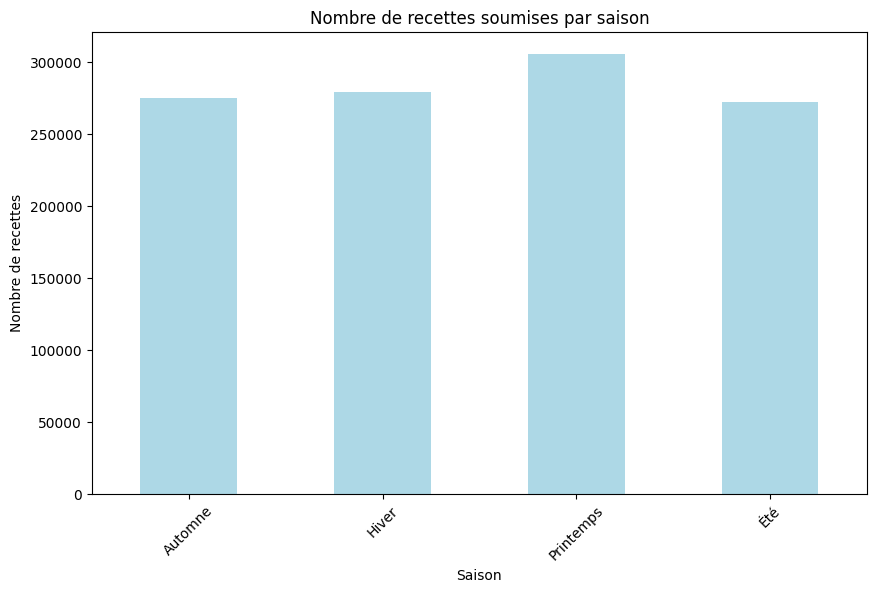

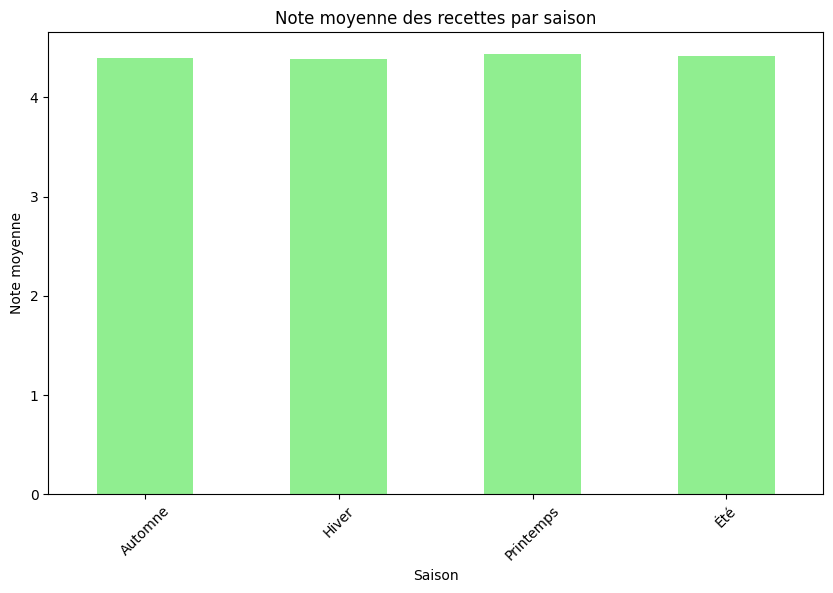


Nombre de recettes pour Thanksgiving : 89505
Note moyenne pour Thanksgiving : 4.40

Nombre de recettes pour Noël : 77440
Note moyenne pour Noël : 4.38


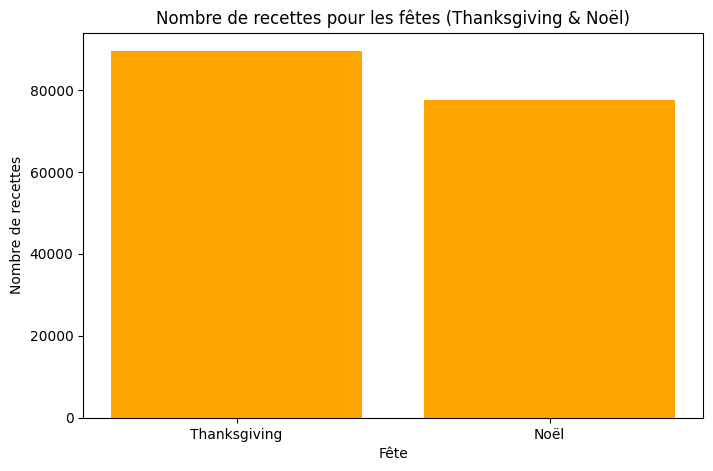

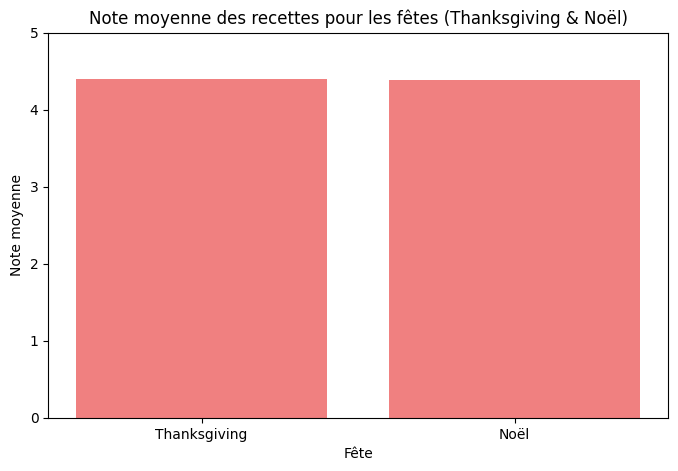

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

class RecipeSeasonAnalysis:
    def __init__(self, interactions_path, recipes_path):
        # Charger les datasets
        self.interactions = pd.read_csv(interactions_path)
        self.recipes = pd.read_csv(recipes_path)
        self.recipes['submitted'] = pd.to_datetime(self.recipes['submitted'])  # Conversion en datetime
        self.merged_data = self.merge_data()

    def merge_data(self):
        # Extraire le mois de soumission et ajouter la saison correspondante
        self.recipes['month'] = self.recipes['submitted'].dt.month
        self.recipes['season'] = self.recipes['month'].apply(self.get_season)
        # Fusionner les datasets
        return pd.merge(self.interactions, self.recipes, left_on='recipe_id', right_on='id')

    @staticmethod
    def get_season(month):
        # Fonction pour assigner une saison à chaque mois
        if month in [12, 1, 2]:
            return 'Hiver'  # Winter
        elif month in [3, 4, 5]:
            return 'Printemps'  # Spring
        elif month in [6, 7, 8]:
            return 'Été'  # Summer
        elif month in [9, 10, 11]:
            return 'Automne'  # Fall

    def recipes_per_season(self):
        # Calculer le nombre de recettes par saison
        return self.merged_data.groupby('season')['recipe_id'].count()

    def avg_rating_per_season(self):
        # Calculer la note moyenne par saison
        return self.merged_data.groupby('season')['rating'].mean()

    def plot_recipes_per_season(self, recipes_per_season):
        # Graphique du nombre de recettes par saison
        plt.figure(figsize=(10, 6))
        recipes_per_season.plot(kind='bar', color='lightblue')
        plt.title('Nombre de recettes soumises par saison')
        plt.xlabel('Saison')
        plt.ylabel('Nombre de recettes')
        plt.xticks(rotation=45)
        plt.show()

    def plot_avg_rating_per_season(self, avg_rating_per_season):
        # Graphique des notes moyennes par saison
        plt.figure(figsize=(10, 6))
        avg_rating_per_season.plot(kind='bar', color='lightgreen')
        plt.title('Note moyenne des recettes par saison')
        plt.xlabel('Saison')
        plt.ylabel('Note moyenne')
        plt.xticks(rotation=45)
        plt.show()

    def holiday_analysis(self):
        # Filtrer les recettes pour Thanksgiving et Noël
        thanksgiving_recipes = self.merged_data[self.merged_data['submitted'].dt.month == 11]
        christmas_recipes = self.merged_data[self.merged_data['submitted'].dt.month == 12]
        
        # Calculer le nombre et les notes moyennes pour chaque fête
        num_thanksgiving_recipes = thanksgiving_recipes['recipe_id'].count()
        num_christmas_recipes = christmas_recipes['recipe_id'].count()
        avg_rating_thanksgiving = thanksgiving_recipes['rating'].mean()
        avg_rating_christmas = christmas_recipes['rating'].mean()

        return {
            'Thanksgiving': {'count': num_thanksgiving_recipes, 'avg_rating': avg_rating_thanksgiving},
            'Noël': {'count': num_christmas_recipes, 'avg_rating': avg_rating_christmas}
        }

    def plot_holiday_data(self, holiday_data):
        # Extraire les données
        fetes = list(holiday_data.keys())
        nb_recettes = [holiday_data[f]['count'] for f in fetes]
        avg_ratings = [holiday_data[f]['avg_rating'] for f in fetes]
        
        # Visualiser le nombre de recettes
        plt.figure(figsize=(8, 5))
        plt.bar(fetes, nb_recettes, color='orange')
        plt.title('Nombre de recettes pour les fêtes (Thanksgiving & Noël)')
        plt.xlabel('Fête')
        plt.ylabel('Nombre de recettes')
        plt.show()

        # Visualiser les notes moyennes pour chaque fête
        plt.figure(figsize=(8, 5))
        plt.bar(fetes, avg_ratings, color='lightcoral')
        plt.title('Note moyenne des recettes pour les fêtes (Thanksgiving & Noël)')
        plt.xlabel('Fête')
        plt.ylabel('Note moyenne')
        plt.ylim(0, 5)
        plt.show()

    def analyze(self):
        # Exécuter les différentes analyses
        recipes_per_season = self.recipes_per_season()
        avg_rating_per_season = self.avg_rating_per_season()

        print("Nombre de recettes par saison :")
        print(recipes_per_season)
        print("\nNote moyenne par saison :")
        print(avg_rating_per_season)

        self.plot_recipes_per_season(recipes_per_season)
        self.plot_avg_rating_per_season(avg_rating_per_season)

        # Analyse des fêtes
        holiday_data = self.holiday_analysis()
        for holiday, data in holiday_data.items():
            print(f"\nNombre de recettes pour {holiday} : {data['count']}")
            print(f"Note moyenne pour {holiday} : {data['avg_rating']:.2f}")

        self.plot_holiday_data(holiday_data)

# Utilisation de la classe
recipe_season_analysis = RecipeSeasonAnalysis('archive-3/RAW_interactions.csv', 'archive-3/RAW_recipes.csv')
recipe_season_analysis.analyze()

# IDÉES 4
4. Analyse des recettes par complexité Objectif : Analyser si les utilisateurs préfèrent des recettes simples ou complexes.
Idée : Utiliser le nombre d'étapes de la recette (n_steps) pour mesurer la complexité d'une recette, et analyser la relation entre la complexité et la note moyenne. 

Exemple : Cela permettrait de voir si les utilisateurs préfèrent des recettes avec peu d'étapes (simples) ou des recettes plus complexes.

Nombre de recettes par complexité :
n_steps
0          2
1       9409
2      30699
3      54059
4      73397
       ...  
100        3
108        1
110        6
113        2
145        7
Name: recipe_id, Length: 94, dtype: int64

Note moyenne par complexité :
n_steps
0      4.500000
1      4.468806
2      4.483566
3      4.452876
4      4.444664
         ...   
100    5.000000
108    5.000000
110    3.500000
113    5.000000
145    5.000000
Name: rating, Length: 94, dtype: float64


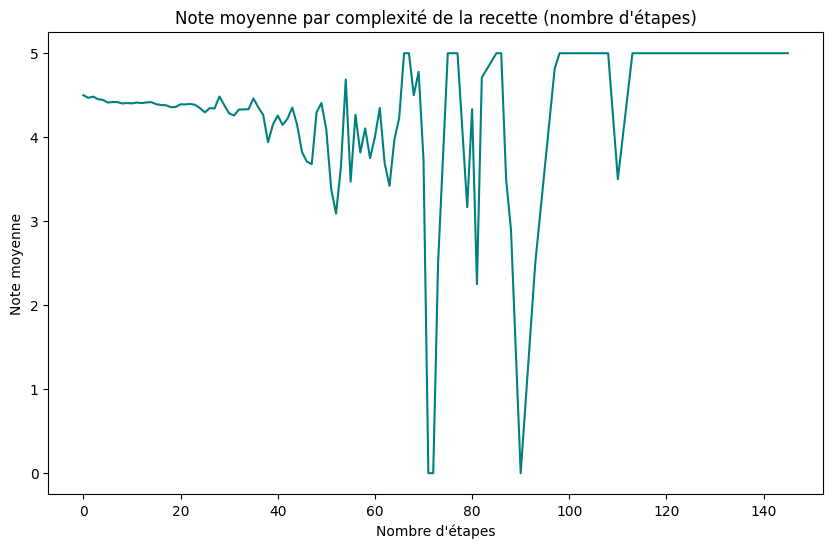


Recettes avec peu d'étapes (moyenne des notes) : 4.48
Recettes avec beaucoup d'étapes (moyenne des notes) : 4.34


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

class RecipeComplexityAnalysis:
    def __init__(self, merged_data):
        # Initialiser avec les données fusionnées
        self.merged_data = merged_data

    def count_recipes_per_complexity(self):
        # Compter le nombre de recettes par complexité (nombre d'étapes)
        return self.merged_data.groupby('n_steps')['recipe_id'].count()

    def avg_rating_per_complexity(self):
        # Calculer la note moyenne par complexité (nombre d'étapes)
        return self.merged_data.groupby('n_steps')['rating'].mean()

    def plot_avg_rating_per_complexity(self, avg_rating_per_complexity):
        # Visualiser la note moyenne en fonction du nombre d'étapes
        plt.figure(figsize=(10, 6))
        avg_rating_per_complexity.plot(kind='line', color='teal')
        plt.title('Note moyenne par complexité de la recette (nombre d\'étapes)')
        plt.xlabel('Nombre d\'étapes')
        plt.ylabel('Note moyenne')
        plt.show()

    def analyze_extreme_complexities(self):
        # Recettes avec très peu d'étapes (< 3)
        low_complexity_recipes = self.merged_data[self.merged_data['n_steps'] < 3]
        # Recettes avec beaucoup d'étapes (> 20)
        high_complexity_recipes = self.merged_data[self.merged_data['n_steps'] > 20]

        return {
            'low_complexity': low_complexity_recipes['rating'].mean(),
            'high_complexity': high_complexity_recipes['rating'].mean()
        }

    def analyze(self):
        # Compter le nombre de recettes par complexité
        count_per_complexity = self.count_recipes_per_complexity()
        print("Nombre de recettes par complexité :")
        print(count_per_complexity)

        # Calculer la note moyenne par complexité
        avg_rating_per_complexity = self.avg_rating_per_complexity()
        print("\nNote moyenne par complexité :")
        print(avg_rating_per_complexity)

        # Visualiser la note moyenne par complexité
        self.plot_avg_rating_per_complexity(avg_rating_per_complexity)

        # Analyser les recettes avec très peu ou beaucoup d'étapes
        extreme_complexities = self.analyze_extreme_complexities()
        print(f"\nRecettes avec peu d'étapes (moyenne des notes) : {extreme_complexities['low_complexity']:.2f}")
        print(f"Recettes avec beaucoup d'étapes (moyenne des notes) : {extreme_complexities['high_complexity']:.2f}")

# Chargement des datasets et fusion
interactions = pd.read_csv('archive-3/RAW_interactions.csv')
recipes = pd.read_csv('archive-3/RAW_recipes.csv')

# Fusionner les deux datasets sur la colonne 'recipe_id'
merged_data = pd.merge(interactions, recipes, left_on='recipe_id', right_on='id')

# Utilisation de la classe avec des données fusionnées (merged_data)
complexity_analysis = RecipeComplexityAnalysis(merged_data)
complexity_analysis.analyze()

# IDÉES 5
**5. Analyse des ingrédients les plus populaires par période de l'année**

**Objectif : Identifier si certains ingrédients sont plus populaires à des moments spécifiques de l'année.**

**Idée :** Analyser les ingrédients les plus utilisés pour chaque saison ou fête (Noël, Thanksgiving, etc.), et voir s'il existe des tendances saisonnières dans l'utilisation des ingrédients (par exemple, l'utilisation de la cannelle pendant l'hiver ou de la citrouille à l'automne).

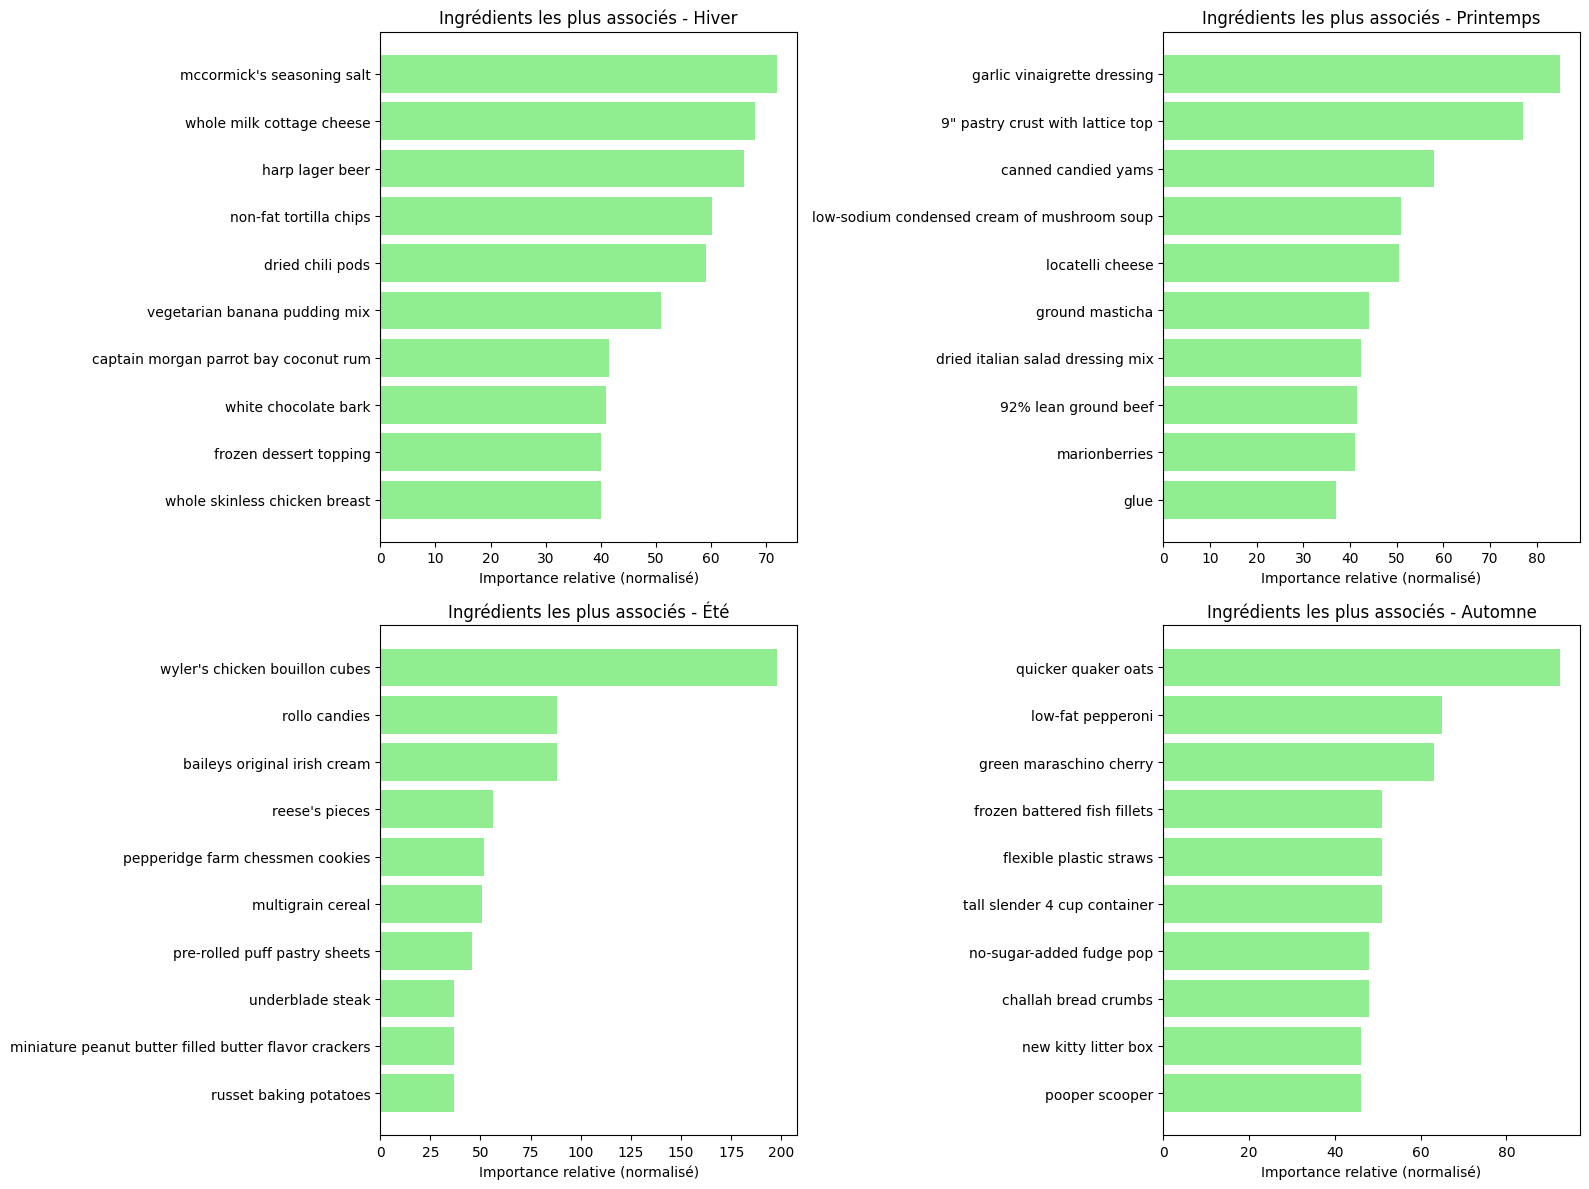

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

class IngredientSeasonalAnalysis:
    def __init__(self, merged_data, recipes):
        # Initialiser les données
        self.merged_data = merged_data
        self.recipes = recipes
        self.global_ingredient_counts = self.compute_global_ingredient_counts()
        self.add_season_column()  # S'assurer que la colonne 'season' est ajoutée

    def add_season_column(self):
        # Extraire le mois de soumission
        self.merged_data['submitted'] = pd.to_datetime(self.merged_data['submitted'])
        self.merged_data['month'] = self.merged_data['submitted'].dt.month
        
        # Fonction pour assigner une saison à chaque mois
        def get_season(month):
            if month in [12, 1, 2]:
                return 'Hiver'
            elif month in [3, 4, 5]:
                return 'Printemps'
            elif month in [6, 7, 8]:
                return 'Été'
            elif month in [9, 10, 11]:
                return 'Automne'

        # Ajouter la colonne 'season' en fonction du mois
        self.merged_data['season'] = self.merged_data['month'].apply(get_season)

    def compute_global_ingredient_counts(self):
        # Extraire les ingrédients pour toutes les recettes
        all_ingredient_lists = self.recipes['ingredients'].apply(eval)
        # Compter la fréquence globale des ingrédients dans toutes les recettes
        return Counter([ingredient for sublist in all_ingredient_lists for ingredient in sublist])

    def compute_ingredients_by_season(self):
        ingredients_by_season = {}

        # Grouper les données par saison
        for season, group in self.merged_data.groupby('season'):
            # Extraire les ingrédients des recettes pour chaque saison
            ingredient_lists = group['ingredients'].apply(eval)
            
            # Compter la fréquence des ingrédients pour cette saison
            seasonal_counts = Counter([ingredient for sublist in ingredient_lists for ingredient in sublist])
            
            # Normaliser en divisant par la fréquence globale de chaque ingrédient
            normalized_ingredients = {
                ingredient: count / self.global_ingredient_counts[ingredient] 
                for ingredient, count in seasonal_counts.items() 
                if self.global_ingredient_counts[ingredient] > 0
            }
            
            # Trier les ingrédients normalisés par importance
            ingredients_by_season[season] = sorted(normalized_ingredients.items(), key=lambda x: x[1], reverse=True)

        return ingredients_by_season

    def plot_ingredients_by_season(self, ingredients_by_season):
        seasons = ['Hiver', 'Printemps', 'Été', 'Automne']
        fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 layout for 4 graphs
        axs = axs.ravel()  # Flattening the axes array for easier access

        for i, season in enumerate(seasons):
            # Extraire les ingrédients et leur importance relative pour la saison
            if season in ingredients_by_season:
                ingredients, importance = zip(*ingredients_by_season[season][:10])  # Prendre les 10 premiers ingrédients

                # Créer un graphique à barres pour chaque saison
                axs[i].barh(ingredients, importance, color='lightgreen')
                axs[i].set_xlabel('Importance relative (normalisé)')
                axs[i].set_title(f'Ingrédients les plus associés - {season}')
                axs[i].invert_yaxis()  # Inverser l'ordre pour que le premier soit en haut

        # Ajuster la mise en page
        plt.tight_layout()
        plt.show()

    def analyze(self):
        # Calculer les ingrédients normalisés par saison
        ingredients_by_season = self.compute_ingredients_by_season()
        
        # Afficher les résultats
        self.plot_ingredients_by_season(ingredients_by_season)

# Charger les datasets
interactions = pd.read_csv('archive-3/RAW_interactions.csv')
recipes = pd.read_csv('archive-3/RAW_recipes.csv')

# Fusionner les deux datasets sur la colonne 'recipe_id'
merged_data = pd.merge(interactions, recipes, left_on='recipe_id', right_on='id')

# Utiliser la classe pour analyser les ingrédients par saison
ingredient_seasonal_analysis = IngredientSeasonalAnalysis(merged_data, recipes)
ingredient_seasonal_analysis.analyze()

# IDÉES 6
**3. Temps de préparation optimal**

**Objectif : Identifier le temps de préparation optimal pour obtenir une note élevée.**

Idée : Créer un graphique en boîte à moustaches (boxplot) qui montre la distribution des notes par intervalle de temps de préparation. Cela permettrait de voir quelles durées de préparation sont associées à des recettes ayant des notes plus élevées.

/var/folders/vt/5b1vj8_s2b5cyy23mj5bdwt00000gn/T/ipykernel_67140/4237538639.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.merged_data['prep_time_category'], y=self.merged_data['rating'], hue=None, palette='pastel', legend=False)


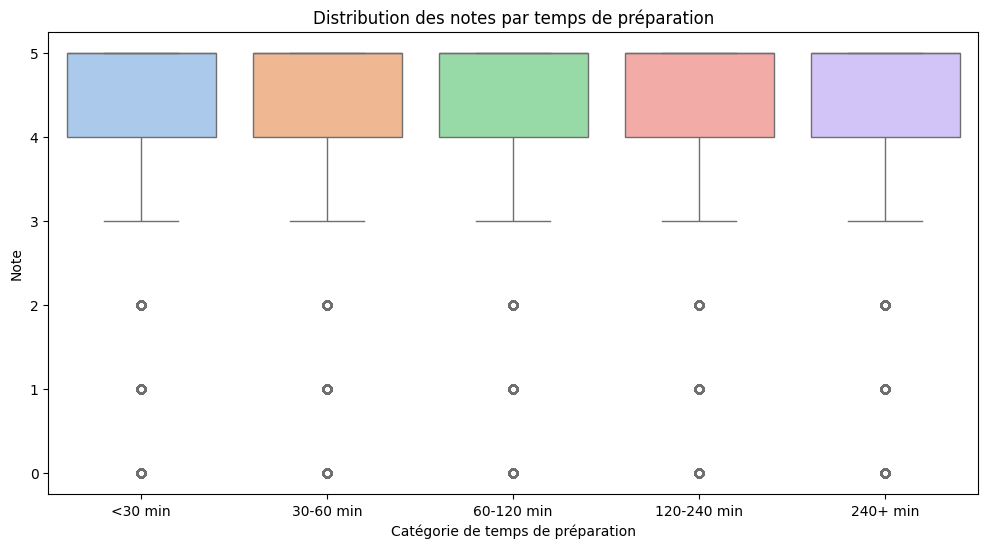

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class PrepTimeAnalysis:
    def __init__(self, merged_data):
        self.merged_data = merged_data

    def categorize_prep_time(self, bins, labels):
        # Créer la colonne 'prep_time_category' en fonction du temps de préparation
        self.merged_data['prep_time_category'] = pd.cut(self.merged_data['minutes'], bins=bins, labels=labels)

    def plot_prep_time_vs_rating(self):
        # Créer un graphique boxplot des notes par temps de préparation avec la palette définie
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=self.merged_data['prep_time_category'], y=self.merged_data['rating'], hue=None, palette='pastel', legend=False)
        plt.title('Distribution des notes par temps de préparation')
        plt.xlabel('Catégorie de temps de préparation')
        plt.ylabel('Note')
        plt.show()



    def analyze(self, bins, labels):
        # Catégoriser le temps de préparation et afficher le boxplot
        self.categorize_prep_time(bins, labels)
        self.plot_prep_time_vs_rating()

# Charger les datasets
interactions = pd.read_csv('archive-3/RAW_interactions.csv')
recipes = pd.read_csv('archive-3/RAW_recipes.csv')

# Fusionner les deux datasets sur la colonne 'recipe_id'
merged_data = pd.merge(interactions, recipes, left_on='recipe_id', right_on='id')

# Définir les intervalles de temps de préparation (minutes)
bins = [0, 30, 60, 120, 240, 480]  # Intervalles de temps (peut être ajusté)
labels = ['<30 min', '30-60 min', '60-120 min', '120-240 min', '240+ min']  # Catégories

# Utiliser la classe pour analyser les catégories de temps de préparation et la distribution des notes
prep_time_analysis = PrepTimeAnalysis(merged_data)
prep_time_analysis.analyze(bins, labels)


# IDÉES 7 )PAS SÛR)
**5. Analyse des tendances de notation par année**

**Objectif : Analyser si la qualité des recettes soumises a évolué au fil du temps.**

Idée : Voir si les notes moyennes des recettes soumises changent avec les années. Cela permettrait d’identifier si les recettes deviennent globalement plus ou moins bien notées avec le temps.

/var/folders/vt/5b1vj8_s2b5cyy23mj5bdwt00000gn/T/ipykernel_67140/419866146.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.merged_data_within_3_years['year_submitted'] = self.merged_data_within_3_years['submitted'].dt.year


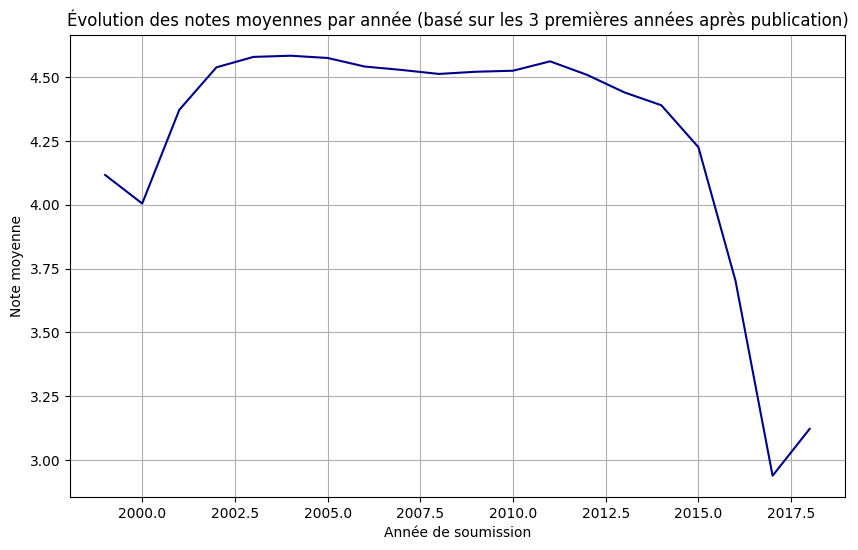

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

class RecipeReviewAnalysis:
    def __init__(self, recipes_path, reviews_path):
        # 1. Charger les datasets
        self.recipes = pd.read_csv(recipes_path)
        self.reviews = pd.read_csv(reviews_path)

        # 2. Convertir les colonnes de dates en format datetime
        self.recipes['submitted'] = pd.to_datetime(self.recipes['submitted'], errors='coerce')
        self.reviews['date'] = pd.to_datetime(self.reviews['date'], errors='coerce')

        # 3. Joindre les datasets recettes et avis
        self.merged_data = pd.merge(self.reviews, self.recipes, left_on='recipe_id', right_on='id')

    def calculate_year_difference(self):
        # 4. Calculer la différence en années entre la date de l'avis et la date de soumission
        self.merged_data['year_diff'] = (self.merged_data['date'] - self.merged_data['submitted']).dt.days / 365.25

    def filter_reviews_within_3_years(self):
        # 5. Filtrer les avis laissés dans les 3 ans suivant la soumission de la recette
        self.merged_data_within_3_years = self.merged_data[self.merged_data['year_diff'] <= 3]

    def calculate_avg_rating_per_year(self):
        # 6. Extraire l'année de soumission pour chaque recette
        self.merged_data_within_3_years['year_submitted'] = self.merged_data_within_3_years['submitted'].dt.year

        # 7. Calculer la note moyenne par année de soumission
        self.avg_rating_per_year = self.merged_data_within_3_years.groupby('year_submitted')['rating'].mean()

    def plot_avg_rating_per_year(self):
        # 8. Visualiser l'évolution des notes moyennes par année
        plt.figure(figsize=(10, 6))
        self.avg_rating_per_year.plot(kind='line', color='darkblue')
        plt.title('Évolution des notes moyennes par année (basé sur les 3 premières années après publication)')
        plt.xlabel('Année de soumission')
        plt.ylabel('Note moyenne')
        plt.grid(True)
        plt.show()

    def analyze(self):
        # Appeler toutes les étapes nécessaires
        self.calculate_year_difference()
        self.filter_reviews_within_3_years()
        self.calculate_avg_rating_per_year()
        self.plot_avg_rating_per_year()

# Utilisation de la classe
recipes_path = 'archive-3/RAW_recipes.csv'  # Remplace par le chemin réel du fichier de recettes
reviews_path = 'archive-3/RAW_interactions.csv'  # Remplace par le chemin réel du fichier d'avis

analysis = RecipeReviewAnalysis(recipes_path, reviews_path)
analysis.analyze()


/var/folders/vt/5b1vj8_s2b5cyy23mj5bdwt00000gn/T/ipykernel_67140/419866146.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.merged_data_within_3_years['year_submitted'] = self.merged_data_within_3_years['submitted'].dt.year


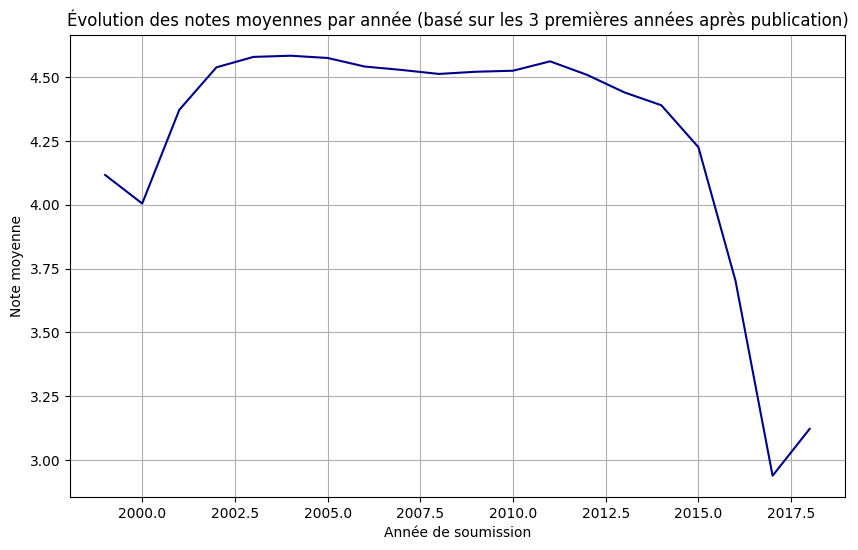

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

class RecipeReviewAnalysis:
    def __init__(self, recipes_path, reviews_path):
        # 1. Charger les datasets
        self.recipes = pd.read_csv(recipes_path)
        self.reviews = pd.read_csv(reviews_path)

        # 2. Convertir les colonnes de dates en format datetime
        self.recipes['submitted'] = pd.to_datetime(self.recipes['submitted'], errors='coerce')
        self.reviews['date'] = pd.to_datetime(self.reviews['date'], errors='coerce')

        # 3. Joindre les datasets recettes et avis
        self.merged_data = pd.merge(self.reviews, self.recipes, left_on='recipe_id', right_on='id')

    def calculate_year_difference(self):
        # 4. Calculer la différence en années entre la date de l'avis et la date de soumission
        self.merged_data['year_diff'] = (self.merged_data['date'] - self.merged_data['submitted']).dt.days / 365.25

    def filter_reviews_within_3_years(self):
        # 5. Filtrer les avis laissés dans les 3 ans suivant la soumission de la recette
        self.merged_data_within_3_years = self.merged_data[self.merged_data['year_diff'] <= 3]

    def calculate_avg_rating_per_year(self):
        # 6. Extraire l'année de soumission pour chaque recette
        self.merged_data_within_3_years['year_submitted'] = self.merged_data_within_3_years['submitted'].dt.year

        # 7. Calculer la note moyenne par année de soumission
        self.avg_rating_per_year = self.merged_data_within_3_years.groupby('year_submitted')['rating'].mean()

    def plot_avg_rating_per_year(self):
        # 8. Visualiser l'évolution des notes moyennes par année
        plt.figure(figsize=(10, 6))
        self.avg_rating_per_year.plot(kind='line', color='darkblue')
        plt.title('Évolution des notes moyennes par année (basé sur les 3 premières années après publication)')
        plt.xlabel('Année de soumission')
        plt.ylabel('Note moyenne')
        plt.grid(True)
        plt.show()

    def analyze(self):
        # Appeler toutes les étapes nécessaires
        self.calculate_year_difference()
        self.filter_reviews_within_3_years()
        self.calculate_avg_rating_per_year()
        self.plot_avg_rating_per_year()

# Utilisation de la classe
recipes_path = 'archive-3/RAW_recipes.csv'  # Remplace par le chemin réel du fichier de recettes
reviews_path = 'archive-3/RAW_interactions.csv'  # Remplace par le chemin réel du fichier d'avis

analysis = RecipeReviewAnalysis(recipes_path, reviews_path)
analysis.analyze()


# IDÉES 8

**8. Analyse des corrélations entre les caractéristiques des recettes**

**Objectif : Identifier si certaines caractéristiques des recettes (temps de préparation, nombre d'étapes, nombre d'ingrédients, etc.) sont corrélées avec la note reçue.**

Idée : Utiliser une matrice de corrélation pour examiner les relations entre les différentes caractéristiques des recettes et les notes moyennes.

                 user_id  recipe_id        id   minutes  contributor_id  \
user_id         1.000000   0.100059  0.100059  0.000595        0.102746   
recipe_id       0.100059   1.000000  1.000000  0.003164        0.102952   
id              0.100059   1.000000  1.000000  0.003164        0.102952   
minutes         0.000595   0.003164  0.003164  1.000000       -0.000133   
contributor_id  0.102746   0.102952  0.102952 -0.000133        1.000000   
n_steps         0.051686   0.056699  0.056699 -0.000438        0.027721   
n_ingredients   0.008134   0.018120  0.018120 -0.001059        0.005379   
rating         -0.196180  -0.013570 -0.013570  0.001053       -0.012214   

                 n_steps  n_ingredients    rating  
user_id         0.051686       0.008134 -0.196180  
recipe_id       0.056699       0.018120 -0.013570  
id              0.056699       0.018120 -0.013570  
minutes        -0.000438      -0.001059  0.001053  
contributor_id  0.027721       0.005379 -0.012214  
n_steps     

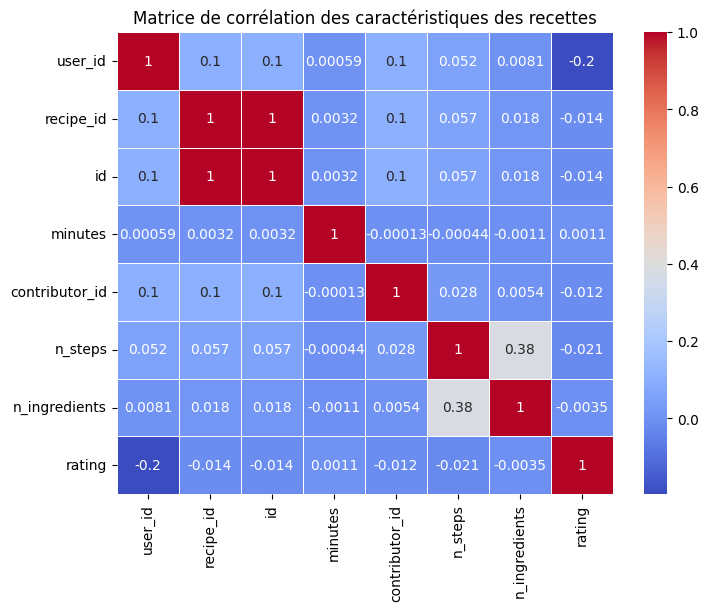

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class CorrelationAnalysis:
    def __init__(self, merged_data):
        # Initialiser avec les données fusionnées
        self.merged_data = merged_data

    def select_numeric_columns(self):
        # Sélectionner les colonnes numériques pertinentes pour la corrélation
        self.numeric_columns = self.merged_data[['user_id', 'recipe_id', 'id', 'minutes', 'contributor_id', 'n_steps', 'n_ingredients', 'rating']]

    def calculate_correlation_matrix(self):
        # Calculer la matrice de corrélation
        self.correlation_matrix = self.numeric_columns.corr()
        print(self.correlation_matrix)

    def plot_correlation_matrix(self):
        # Visualiser la matrice de corrélation
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Matrice de corrélation des caractéristiques des recettes')
        plt.show()

    def analyze(self):
        # Appeler les différentes étapes de l'analyse
        self.select_numeric_columns()
        self.calculate_correlation_matrix()
        self.plot_correlation_matrix()

# Charger les datasets
interactions = pd.read_csv('archive-3/RAW_interactions.csv')
recipes = pd.read_csv('archive-3/RAW_recipes.csv')

# Fusionner les deux datasets sur la colonne 'recipe_id'
merged_data = pd.merge(interactions, recipes, left_on='recipe_id', right_on='id')

# Utiliser la classe pour analyser la corrélation
correlation_analysis = CorrelationAnalysis(merged_data)
correlation_analysis.analyze()
